In [1]:
#Advanced Regression

In [2]:
# The solution is organized into the following sections:

# we will perform DEA, Data Cleaning,Data Preparation,Model Building and Evaluation followed by Observations and Inferences


In [3]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset
data = pd.read_csv("train.csv", encoding='utf-8')

# Display the first few rows of the dataset
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#column details
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# dimension
data.shape

(1460, 81)

In [7]:
# Describe the dataset
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
#checking duplicates
sum(data.duplicated(subset = 'Id')) == 0

True

In [9]:
# Checking for duplicate entries based on the 'Id' column
duplicates_exist = data.duplicated(subset='Id').sum() == 0

# Output the result
duplicates_exist


True

In [10]:
# Checking for outliers in numerical columns
data.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

In [11]:
#Remove outliner

In [12]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return filtered_df


In [13]:
#shape of the dataframe
data.shape

(1460, 81)

In [14]:
# Identify columns with null values
columns_with_nulls = data.columns[data.isnull().any()]

# Calculate the percentage of missing values for each column
null_percentage = data.isnull().sum() / len(data) * 100

# Filter and sort columns with missing values
null_percentage = null_percentage[null_percentage > 0]
null_percentage.sort_values(ascending=False, inplace=True)

# Display the result
null_percentage


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [15]:
# Impute Missing Values for Categorical Variables with Meaningful Nulls

In [16]:
# List of categorical columns where nulls indicate the absence of a facility
null_with_meaning = [
    "Alley", "MasVnrType", "BsmtQual", "BsmtCond", 
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
    "FireplaceQu", "GarageType", "GarageFinish", 
    "GarageQual", "GarageCond", "PoolQC", "Fence", 
    "MiscFeature"
]

# Impute missing values with 'None'
for column in null_with_meaning:
    data[column].fillna("None", inplace=True)


In [17]:
# Check nulls once again

data.columns[data.isnull().any()] 

null_2 = data.isnull().sum()/len(data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [18]:
# Examine the 'LotFrontage' column
data['LotFrontage'].describe()


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [20]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [21]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [22]:
## Impute Missing Values for Numeric Columns

#According to the data dictionary, "LotFrontage" represents the linear feet of street connected to the property. Since it is a numeric variable with a fair distribution, it can be imputed with the median values of similar 'Neighborhood' groups.

#We will also impute missing values for other numeric columns.

In [23]:
# Impute 'LotFrontage' based on the median value of each 'Neighborhood'
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Impute missing values in other numeric columns with their respective medians
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

# Drop rows with missing 'Electrical' values
data.dropna(subset=['Electrical'], inplace=True)


In [24]:
# Crosscheck the updated 'LotFrontage' column
data['LotFrontage'].describe()

count    1459.000000
mean       70.197738
std        22.439474
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
data['GarageYrBlt'].describe()

count    1459.000000
mean     1978.569568
std        23.993708
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [26]:
data['MasVnrArea'].describe()

count    1459.000000
mean      103.187800
std       180.773158
min         0.000000
25%         0.000000
50%         0.000000
75%       164.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [27]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [28]:
# Check the no. of rows retained
len(data.index)
len(data.index)/1460

0.9993150684931507

In [29]:
# Perform EDA

In [30]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [31]:
# Dropping ID Column
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [32]:
# Comparing the target variable 'Sale Price' with a few selected columns.

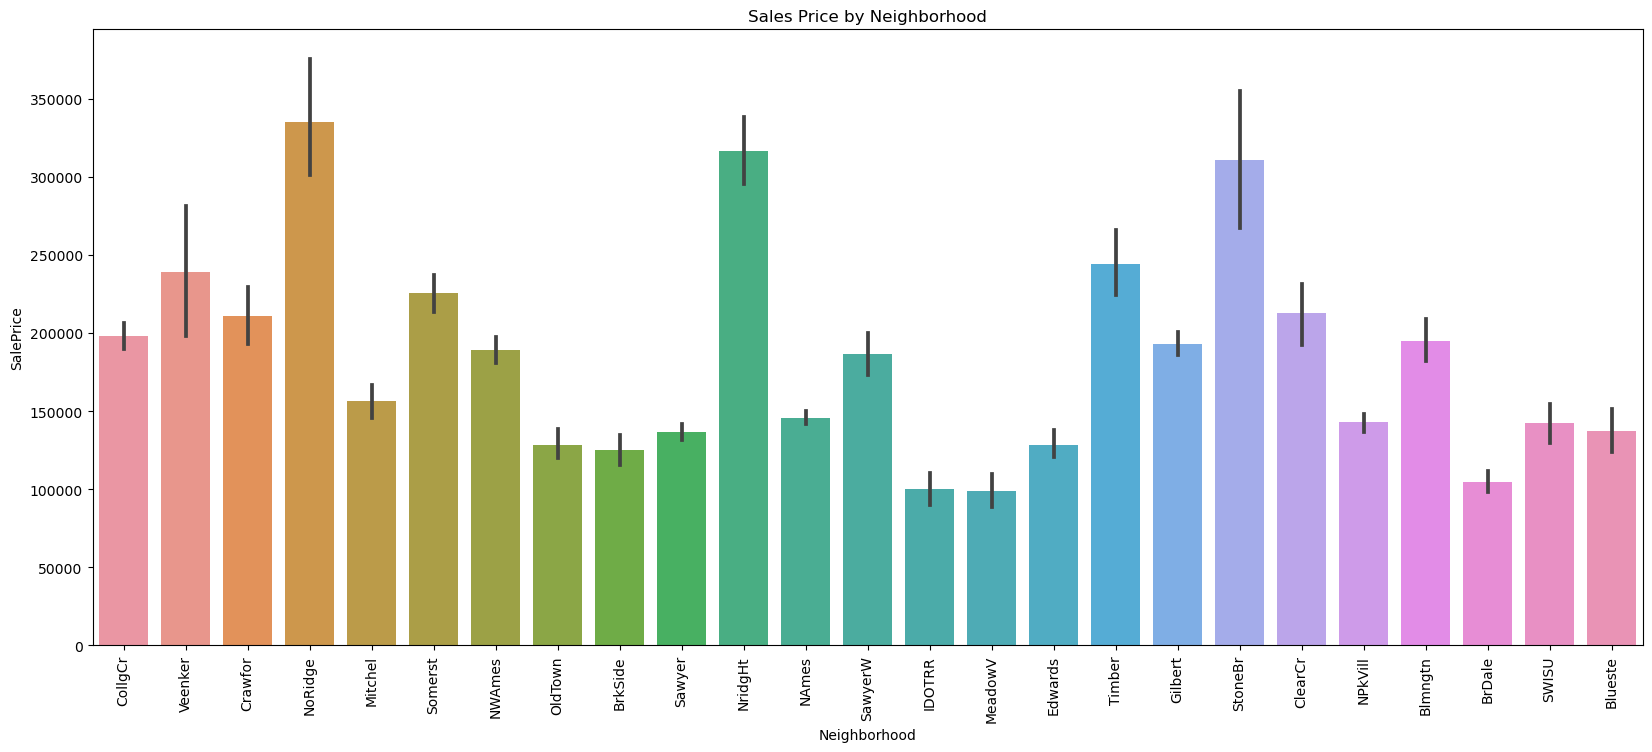

In [33]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=data)
plt.title("Sales Price by Neighborhood")
plt.xticks(rotation=90)
plt.show()

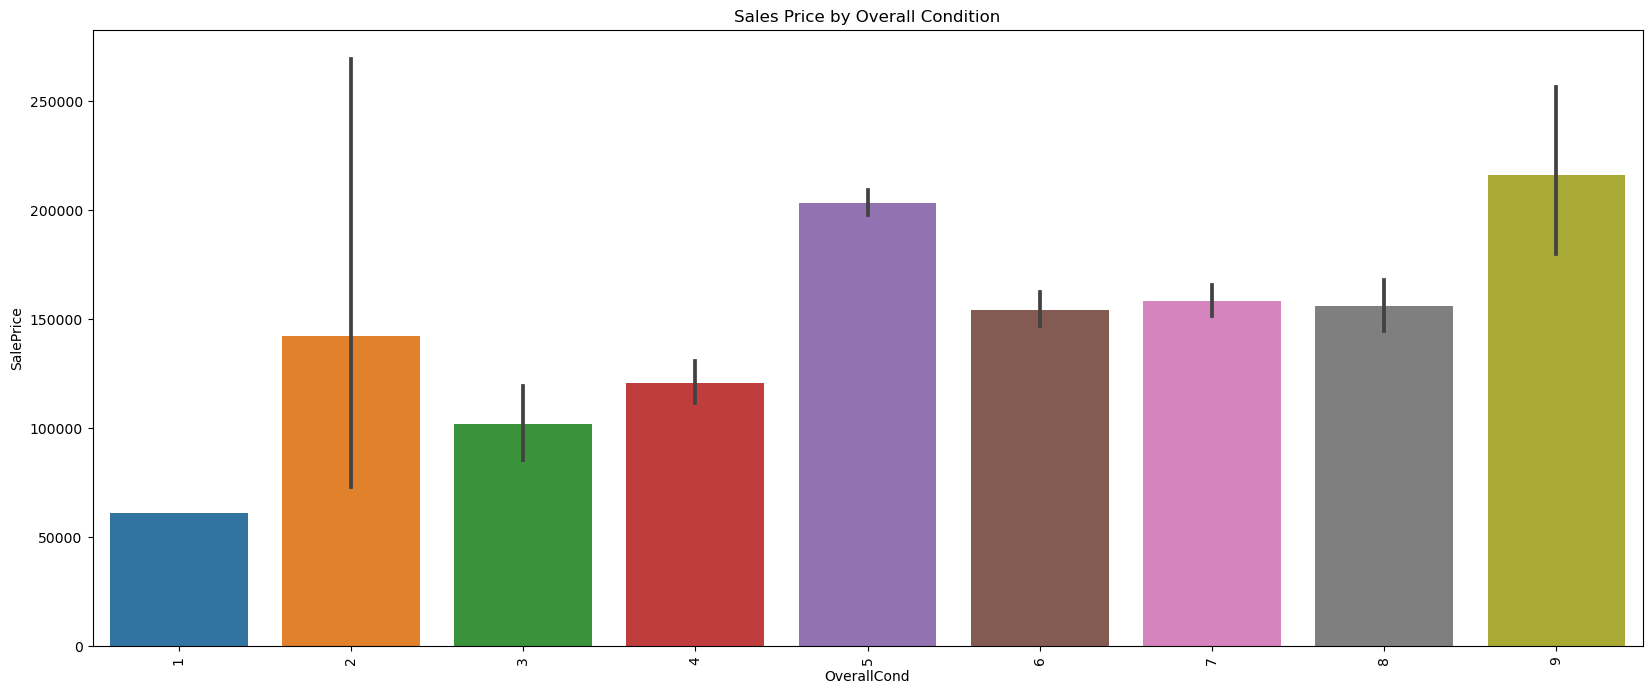

In [34]:
# Some neighborhoods have higher property prices.
# Plotting 'Overall Condition' against 'Sale Price'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data=data)
plt.title("Sales Price by Overall Condition")
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

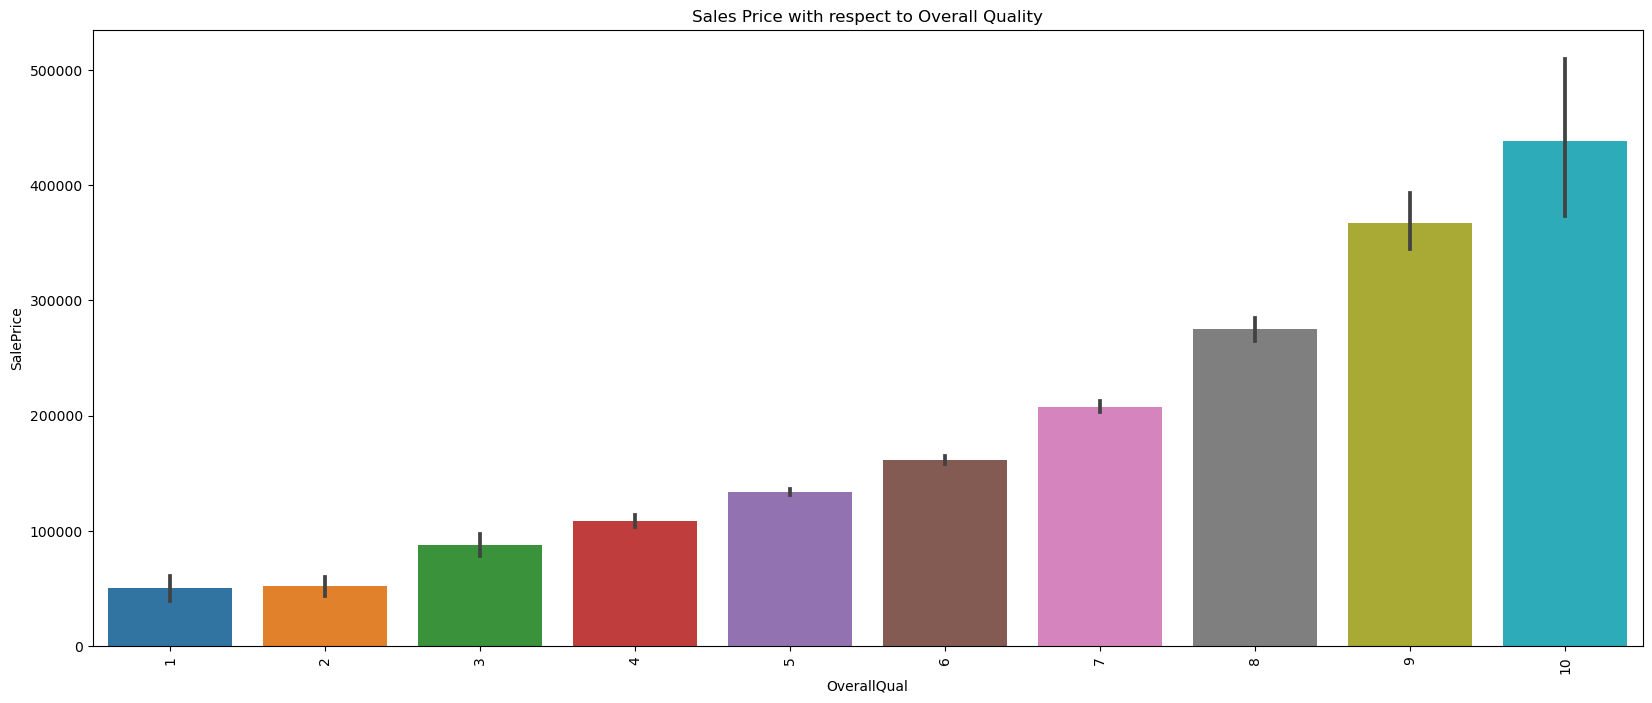

In [35]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

In [36]:
#effect on sale price with quality 

<Axes: xlabel='SalePrice', ylabel='Density'>

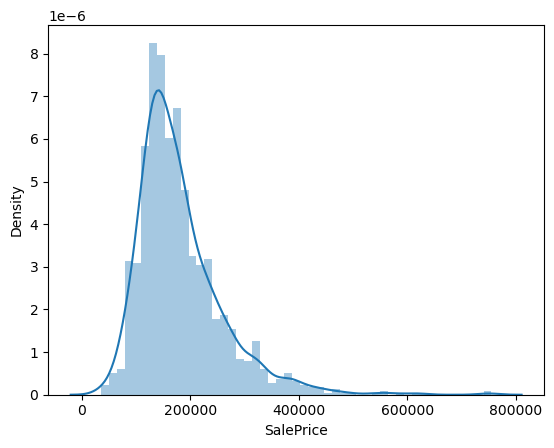

In [37]:
sns.distplot(data['SalePrice'])

In [38]:
data_raw = data.copy

In [39]:
# Since the Sale Price distribution is skewed left, applying log transformation to center the data
# Log Transformation
import numpy as np
data['SalePrice'] = np.log1p(data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

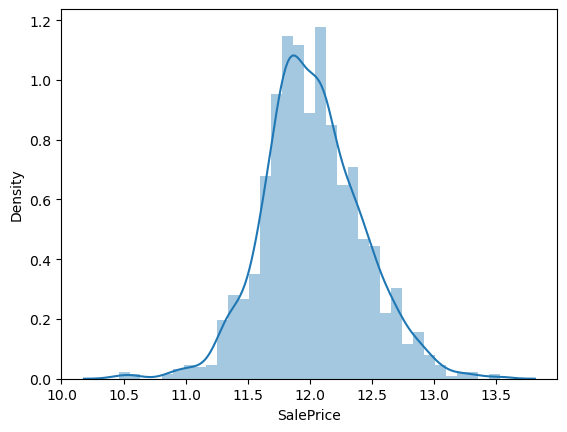

In [40]:
sns.distplot(data['SalePrice'])

In [41]:
# correlation matrix
cor = data_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370454 -0.139766     0.032936    -0.059134   
LotFrontage     -0.370454     1.000000  0.335967     0.239667    -0.043555   
LotArea         -0.139766     0.335967  1.000000     0.105786    -0.005665   
OverallQual      0.032936     0.239667  0.105786     1.000000    -0.092243   
OverallCond     -0.059134    -0.043555 -0.005665    -0.092243     1.000000   
YearBuilt        0.027435     0.120956  0.014296     0.573334    -0.375780   
YearRemodAdd     0.040199     0.084492  0.013852     0.551605     0.074158   
MasVnrArea       0.023792     0.195901  0.103302     0.407075    -0.125922   
BsmtFinSF1      -0.069501     0.232736  0.214121     0.239265    -0.046595   
BsmtFinSF2      -0.065549     0.052264  0.111158    -0.059291     0.040132   
BsmtUnfSF       -0.140627     0.119217 -0.002641     0.308018    -0.137008   
TotalBsmtSF     -0.238160     0.381480  0.260962     0.537523    -0.171796   
1stFlrSF        -0.251484     0.434368  0.299533     0.475933    -0.144646   
2ndFlrSF         0.307713     0.075641  0.051030     0.295969     0.029187   
LowQualFinSF     0.046524     0.031884  0.004773    -0.030502     0.025454   
GrLivArea        0.074949     0.385219  0.263109     0.593021    -0.079777   
BsmtFullBath     0.003799     0.107321  0.158147     0.110700    -0.055250   
BsmtHalfBath    -0.002243     0.006641  0.048034    -0.040291     0.117749   
FullBath         0.131354     0.186534  0.126100     0.551267    -0.193929   
HalfBath         0.177004     0.054113  0.014333     0.274328    -0.060371   
BedroomAbvGr    -0.023502     0.245222  0.119700     0.101789     0.013039   
KitchenAbvGr     0.281833    -0.005609 -0.017796    -0.184040    -0.087085   
TotRmsAbvGrd     0.040274     0.332606  0.190037     0.427720    -0.057485   
Fireplaces      -0.045232     0.249455  0.271398     0.396455    -0.024167   
GarageYrBlt      0.081000     0.062309 -0.025813     0.515236    -0.306031   
GarageCars      -0.040232     0.281378  0.154893     0.600991    -0.185670   
GarageArea      -0.098558     0.339130  0.180392     0.561980    -0.151662   
WoodDeckSF      -0.012598     0.088733  0.171701     0.239000    -0.003318   
OpenPorchSF     -0.005838     0.141819  0.084751     0.308554    -0.032847   
EnclosedPorch   -0.011904     0.008088 -0.018360    -0.114162     0.070238   
3SsnPorch       -0.043786     0.064665  0.020417     0.030314     0.025465   
ScreenPorch     -0.025932     0.041087  0.043147     0.064755     0.054721   
PoolArea         0.008309     0.174574  0.077669     0.065143    -0.002009   
MiscVal         -0.007651     0.005340  0.038063    -0.031461     0.068752   
MoSold          -0.013404     0.007413  0.001179     0.070570    -0.003685   
YrSold          -0.021461     0.004744 -0.014254    -0.027277     0.044003   
SalePrice       -0.084230     0.349895  0.263837     0.791069    -0.077924   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027435      0.040199    0.023792   -0.069501   -0.065549   
LotFrontage     0.120956      0.084492    0.195901    0.232736    0.052264   
LotArea         0.014296      0.013852    0.103302    0.214121    0.111158   
OverallQual     0.573334      0.551605    0.407075    0.239265   -0.059291   
OverallCond    -0.375780      0.074158   -0.125922   -0.046595    0.040132   
YearBuilt       1.000000      0.592512    0.312227    0.250465   -0.048903   
YearRemodAdd    0.592512      1.000000    0.177038    0.129259   -0.067575   
MasVnrArea      0.312227      0.177038    1.000000    0.260989   -0.071453   
BsmtFinSF1      0.250465      0.129259    0.260989    1.000000   -0.050328   
BsmtFinSF2     -0.048903     -0.067575   -0.071453   -0.050328    1.000000   
BsmtUnfSF       0.149444      0.181520    0.113719   -0.495718   -0.209395   
TotalBsmtSF     0.393159      0.292546    0.359798    0.521963    0.104593   
1stFlrSF        0.283056      0.2413

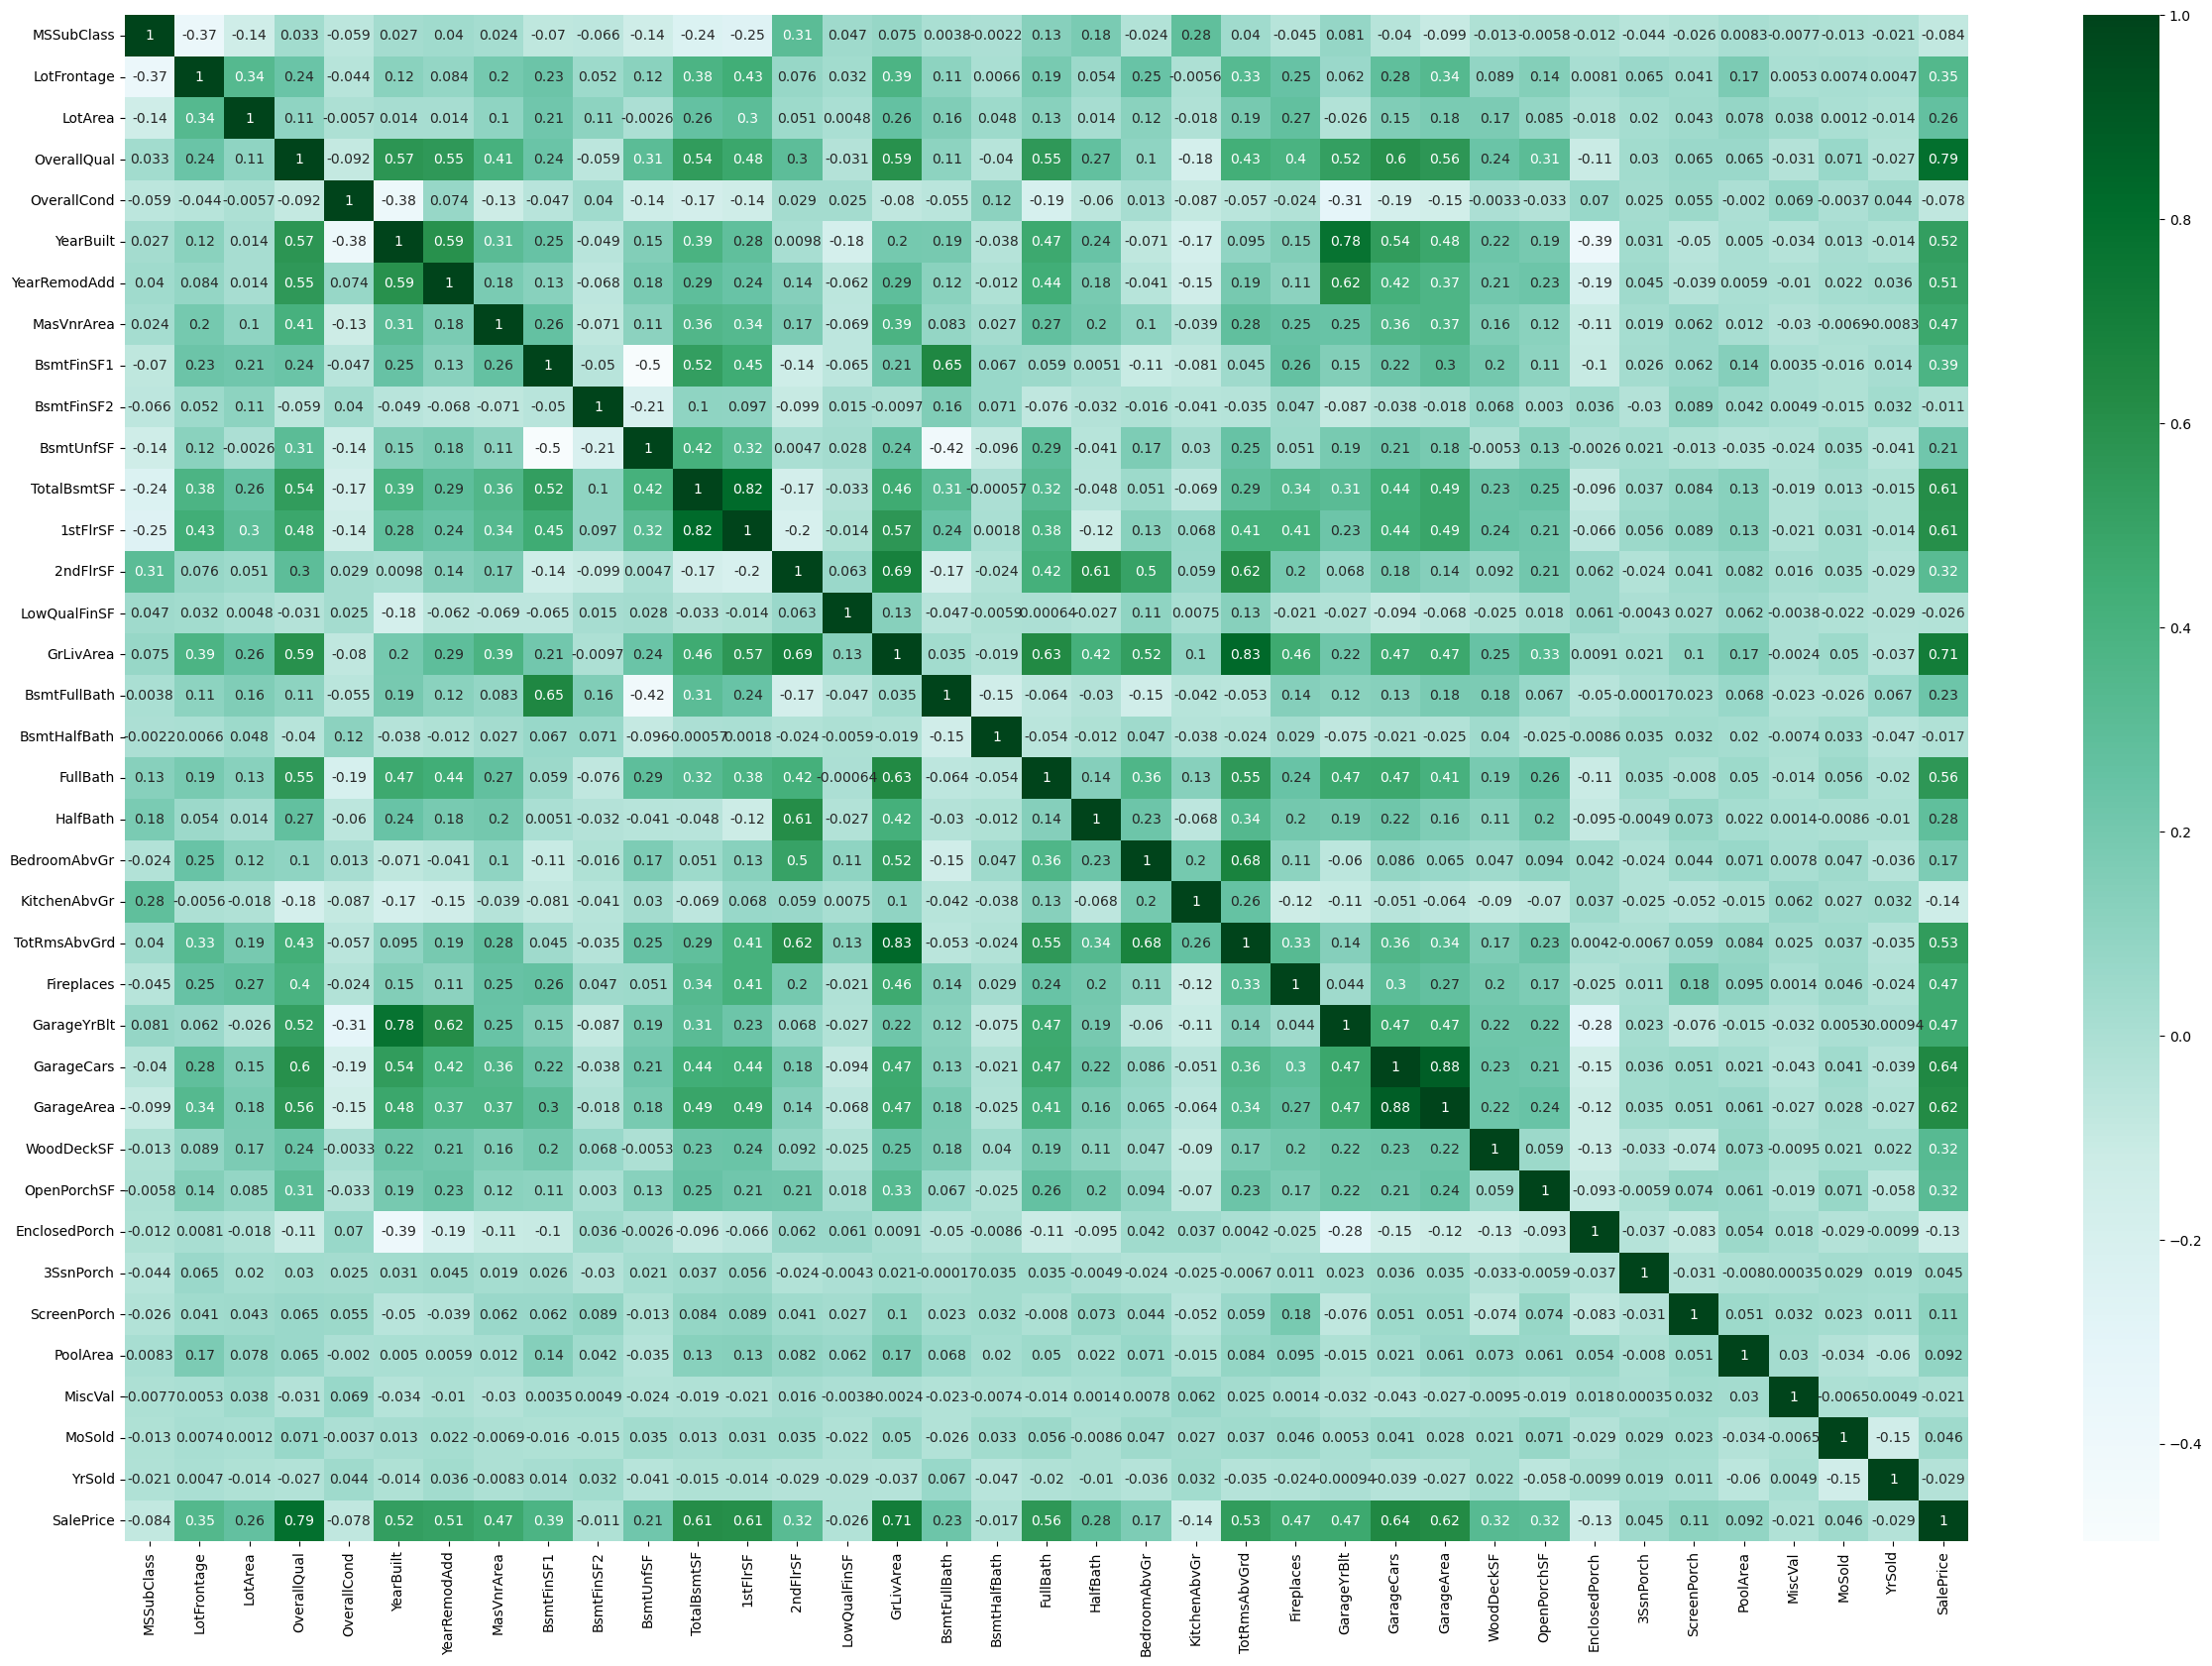

In [42]:
# Plotting correlations on a heatmap

# Adjust figure size
plt.figure(figsize=(30, 20))

# Heatmap with annotations
sns.heatmap(cor, cmap="BuGn", annot=True)
plt.show()


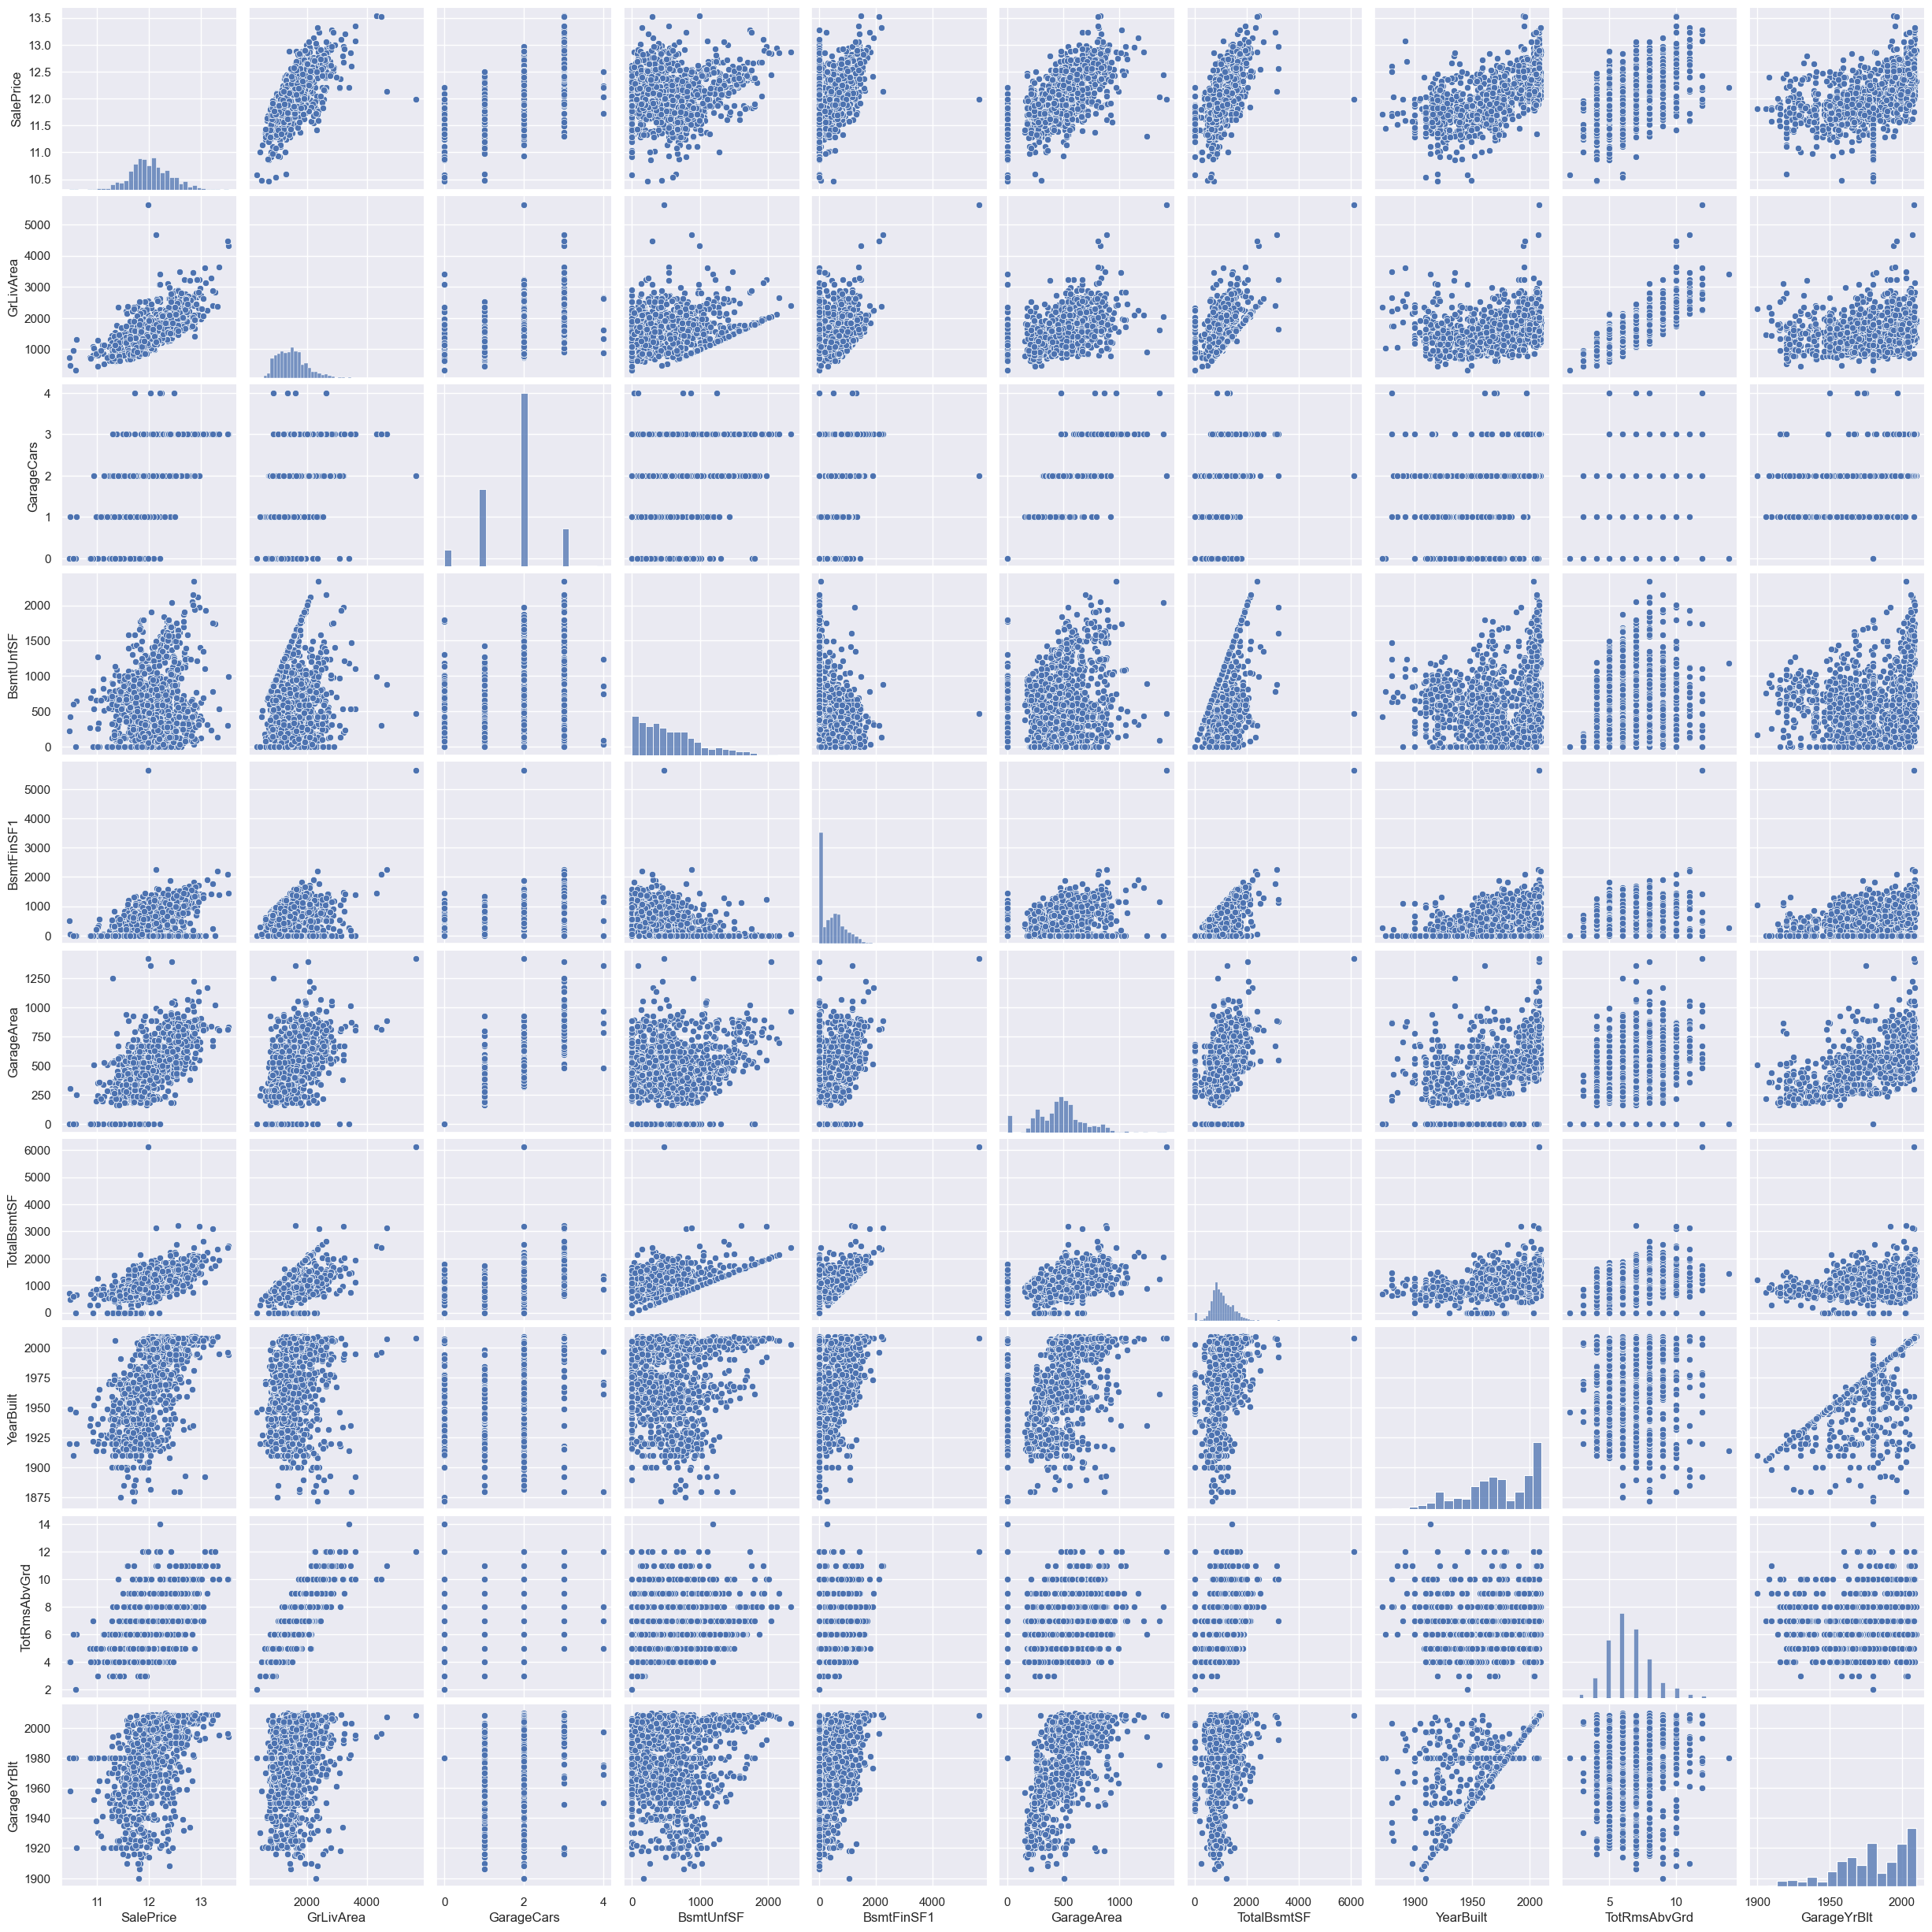

In [43]:
# Observing correlations and predictive power of selected variables
# Checking with a pairplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], height=2.5)
plt.show()


In [44]:
# Drop columns that are correlated and not contributing to 'SalePrice'
columns_to_drop = ['GarageCars', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GarageYrBlt']
data = data.drop(columns_to_drop, axis=1)

# Display the first few rows of the updated dataframe
data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        None     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

In [45]:
#Numeric columns
data.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0          2003          2003       196.0         706           0   
1          1976          1976         0.0         978           0   
2          2001          2002       162.0         486           0   
3          1915          1970         0.0         216           0   
4          2000          2000       350.0         655           0   
...         ...           ...         ...         ...         ...   
1455       1999          2000         0.0           0           0   
1456       1978          1988       119.0         790         163   
1457       1941          2006         0.0         275           0   
1458       1950          1996         0.0          49        1029   
1459       1965          1965         0.0         830         290   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              0         548           0           61              0   
1              1         460         298            0              0   
2              1         608           0           42              0   
3              1         642           0           35            272   
4              1         836         192           84              0   
...          ...         ...         ...          ...   

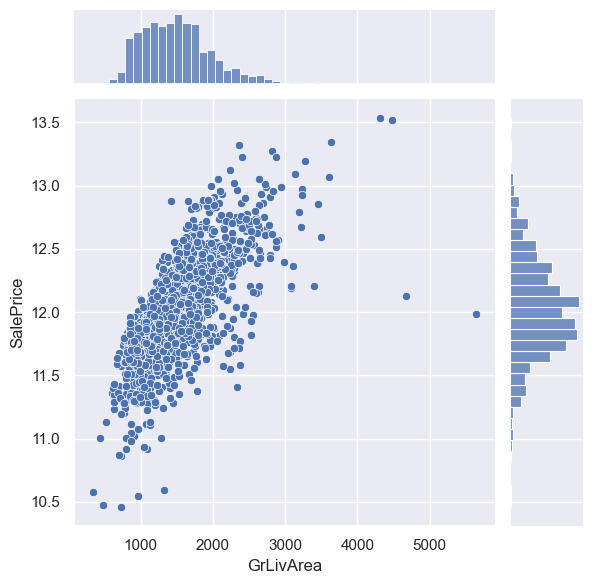

In [46]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

In [47]:
# Removing some outliers on lower right side of 'GrLivArea'
data = remove_outliers(data,'GrLivArea')

In [48]:
# Due to the small size of the dataset, it is not advisable to remove outliers.

In [49]:
data.shape

(1428, 77)

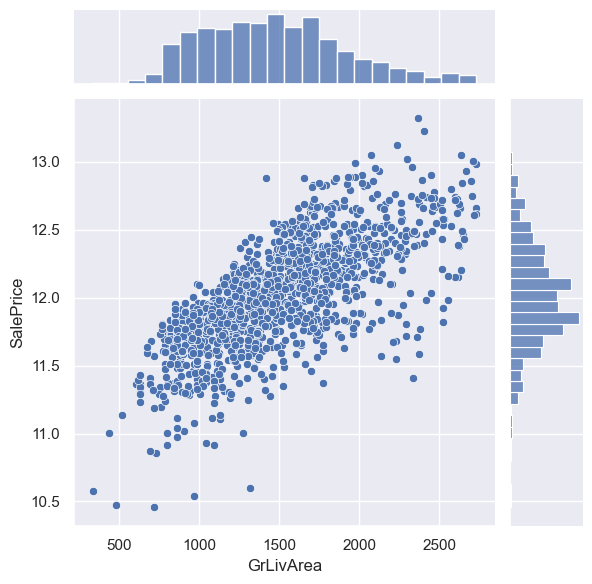

In [50]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = data['GrLivArea'], y = data['SalePrice'])
plt.show()

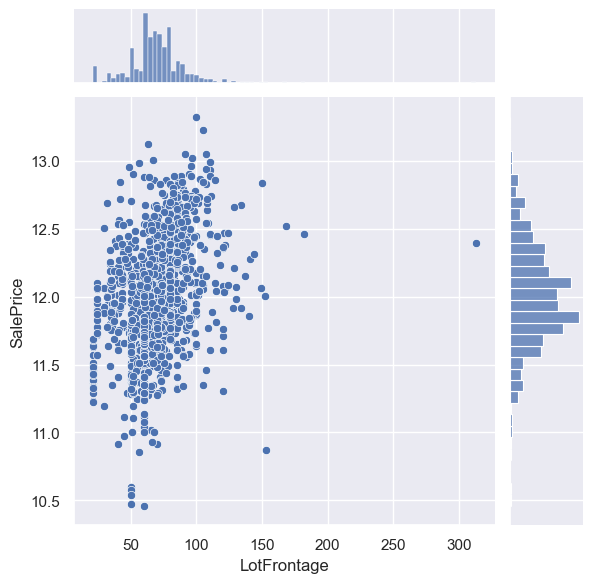

In [51]:
# Lot frontage vs SalePrice 
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

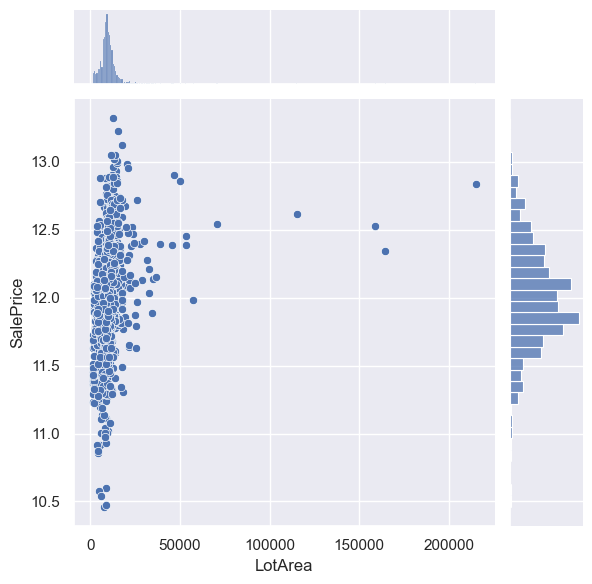

In [52]:
# LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

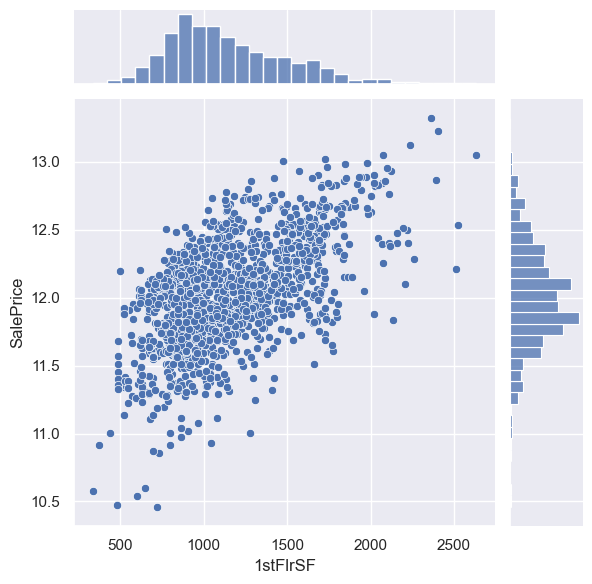

In [53]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

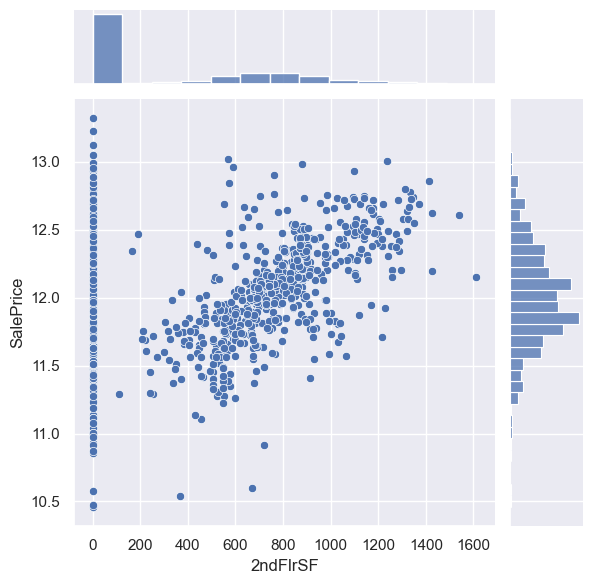

In [54]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

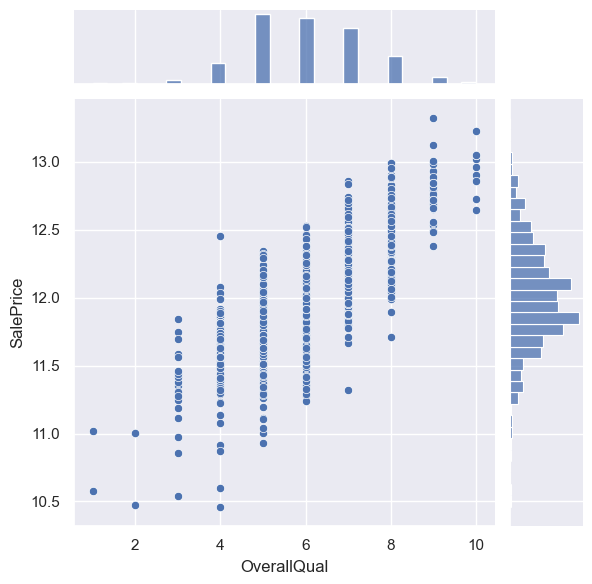

In [55]:
# OverallQual vs SalePrice
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()

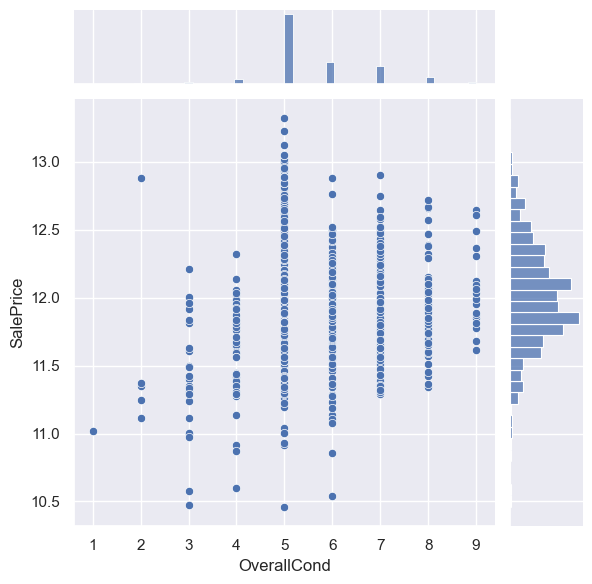

In [56]:
# Scatter plot of OverallCond vs SalePrice
sns.jointplot(x=data['OverallCond'], y=data['SalePrice'], kind='scatter')
plt.show()


In [57]:
# Ground or First level houses (i.e., '0' second floor Sq.Ft) also show a steady increase.
# Creating a column for 'Age of the property' when it was sold: Named 'PropAge'

data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        None     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

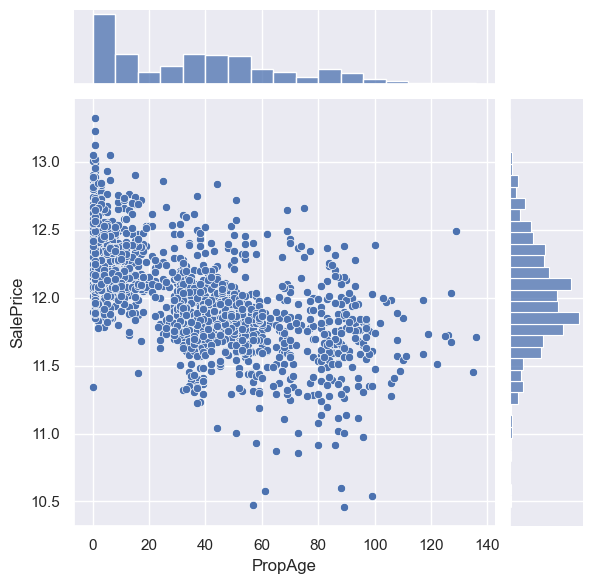

In [58]:
# PropAge vs SalePrice
sns.jointplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

In [59]:
# Increase in property age shows a decreasing sale price trend, indicating newer properties have higher values.
# Dropping columns Month sold, Year sold, Year built, and Year remodeled as they are no longer needed.

data = data.drop(['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1)
data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        None     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA   

In [60]:
data.Street.value_counts()

Street
Pave    1422
Grvl       6
Name: count, dtype: int64

In [61]:
data.Utilities.value_counts()

Utilities
AllPub    1427
NoSeWa       1
Name: count, dtype: int64

In [62]:
# We can also drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [63]:
#check variance 

In [64]:

# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= data.select_dtypes(include=['float64', 'int64'])
l2

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0          196.0         706           0          856       856       854   
1            0.0         978           0         1262      1262         0   
2          162.0         486           0          920       920       866   
3            0.0         216           0          756       961       756   
4          350.0         655           0         1145      1145      1053   
...          ...         ...         ...          ...       ...       ...   
1455         0.0           0           0          953       953       694   
1456       119.0         790         163         1542      2073         0   
1457         0.0         275           0         1152      1188      1152   
1458         0.0          49        1029         1078      1078         0   
1459         0.0         830         290         1256      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0                3             1           0         548           0   
1                3             1           1         460         298   
2                3             1           1         608           0   
3                3             1           1         642           0   
4                4             1           1         836         192   
...            ...           ...         ...         ...         ...   
1455             3             1           1         460           0   
1456             3             1           2         500         349   
1457             4             1           2         252           0   
1458             2             1           0         240         366   
1459             3             1           0         276         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272        

In [65]:
# Displaying value counts for each column in list l2
for i in l2:
    print(data[i].value_counts())


Id
1       1
955     1
976     1
975     1
974     1
       ..
481     1
480     1
479     1
478     1
1460    1
Name: count, Length: 1428, dtype: int64
MSSubClass
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      56
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: count, dtype: int64
LotFrontage
60.0     150
80.0     110
70.0      94
65.0      74
73.0      69
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: count, Length: 112, dtype: int64
LotArea
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: count, Length: 1046, dtype: int64
OverallQual
5     395
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: count, dtype: int64
OverallCond
5    803
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: count, dtype: int64
MasVnrArea
0.0

In [66]:
# Dropping columns: 'PoolQC', 'MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional'
data = data.drop(['PoolQC', 'MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional'], axis=1)


In [67]:
#These columns initially had high null values, some of which were imputed. After imputation, we found very little variance in the data. Therefore, we have decided to drop these columns

In [68]:
data.shape

(1428, 63)

In [69]:
# Data Prep

In [70]:
# Data Preparation
# Let's prepare the data and build the model.
# Drop 'Id' from the dataframe

data = data.drop(['Id'], axis=1)
data.head()


MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            5     Gable     VinylSd     VinylSd    BrkFace       196.0   
1            8     Gable     MetalSd     MetalSd       None         0.0   
2            5     Gable     VinylSd     VinylSd    BrkFace       162.0   
3            5     Gable     Wd Sdng     Wd Shng       None         0.0   
4            5     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC CentralAir  \
0         706          Unf           0          856        Ex          Y   
1         978          Unf           0         1262        Ex          Y   
2         486          Unf           0          920        Ex          Y   
3         216          Unf           0          756        Gd          Y   
4         655          Unf           0         1145        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual  \
0           0        None     Attchd          RFn         548         TA   
1           1          TA     Attchd          RFn         460         TA   
2           1          TA     Attchd          RFn         608         TA   
3           1          Gd     Detchd          Unf         642         TA   
4           1          TA     Attchd          RFn         836         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   
3  

In [71]:
# Types of each feature in data: int, float, object
types = data.dtypes

# Numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == 'float64')]

# Categorical values are type object
categorical_type = types[types == 'object']


In [72]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

0
object     33
int64      26
float64     3
Name: count, dtype: int64

In [73]:
# Convert numeric_type to a list for easier handling
numerical_columns = list(numeric_type.index)
print(numerical_columns)


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [74]:
# List of categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)


['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [75]:
#create dummy columns 

In [76]:
data = pd.get_dummies(data, drop_first=True )
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  PropAge  \
0              0          0            0         0  12.247699        5   
1              0          0            0         0  12.109016       31   
2              0          0            0         0  12.317171        7   
3            272          0            0         0  11.849405       91   
4              0          0            0         0  12.429220        8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0        False        False         True        False         False   
1        False        False         True        False         False   
2        False        False         True        False         False   
3        False        False         True        False         False   
4        False        False         True        False         False   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0         False          True            False            False   
1         False          True            False            False   
2         False         False            False            False   
3         False         False            False            False   
4         False         False            False            False   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0             True              False          False          False   
1             True              False           True          False   
2             True              False          False          False   
3             True              False          False          False   
4             True              False           True          False   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0              True          False          False                 False   
1             False          False          False                 False   
2              True          False          False                 False   
3             False          False          False                 False   
4             False          False          False                 False   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighb

In [77]:
X = data.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PropAge  MSZoning_FV  \
0              0          0            0         0        5        False   
1              0          0            0         0       31        False   
2              0          0            0         0        7        False   
3            272          0            0         0       91        False   
4              0          0            0         0        8        False   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0        False         True        False         False         False   
1        False         True        False         False         False   
2        False         True        False         False         False   
3        False         True        False         False         False   
4        False         True        False         False         False   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0          True            False            False             True   
1          True            False            False             True   
2         False            False            False             True   
3         False            False            False             True   
4         False            False            False             True   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0              False          False          False              True   
1              False           True          False             False   
2              False          False          False              True   
3              False          False          False             False   
4              False           True          False             False   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0          False          False                 False                False   
1          False          False                 False                False   
2          False          False                 False                False   
3          False          False                 False                False   
4          False          False                 False                Fa

In [78]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [79]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])



In [81]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
840     0.300344    -0.441713  0.176809    -0.013477     2.106384   -0.565309   
1236    2.406733    -1.554688 -0.754915     0.734488    -0.530555    0.054883   
561    -0.869873     0.346644 -0.032968    -0.761442    -0.530555   -0.565309   
44     -0.869873     0.022026 -0.234921    -0.761442     0.348424   -0.565309   
1277    0.534387     0.485766  0.735824    -0.013477    -0.530555    1.535154   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
840    -0.654672   -0.280826    -0.884128 -0.924914  0.840324      -0.10779   
1236   -1.019985   -0.280826    -0.656905 -1.056031  1.300661      -0.10779   
561     1.488027    0.510819     0.886731  0.725453 -0.787813      -0.10779   
44     -0.600812    2.975861     0.296445  0.044214 -0.787813      -0.10779   
1277    0.216458   -0.280826     1.605448  1.680329 -0.787813      -0.10779   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
840    0.040537     -0.812941      -0.25107  0.871359 -0.737334      1.468346   
1236   0.363307     -0.812941      -0.25107  0.871359  1.258863     -1.028467   
561   -0.167918      1.111533      -0.25107 -0.988657 -0.737334     -1.028467   
44    -0.703626      1.111533      -0.25107 -0.988657 -0.737334      0.219940   
1277   0.582969      1.111533      -0.25107 -0.988657  1.258863      0.219940   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
840      -0.227793   -0.920004   -0.308860   -0.747806    -0.728025   
1236     -0.227793   -0.920004    0.040206   -0.747806    -0.258161   
561      -0.227793    0.672862   -0.223952    1.248208    -0.066735   
44       -0.227793   -0.920004   -0.780573   -0.747806    -0.728025   
1277     -0.227793    0.672862    0.068509   -0.747806    -0.728025   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  MSZoning_FV  \
840        3.885249  -0.111436    -0.263941 -0.031654  1.503461        False   
1236      -0.374770  -0.111436    -0.263941 -0.031654 -1.014323        False   
561       -0.374770  -0.111436    -0.263941 -0.031654 -0.186105        False   
44        -0.374770  -0.111436    -0.263941 -0.031654  0.310826        False   
1277      -0.374770  -0.111436    -0.263941 -0.031654  0.145183        False   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
840          True        False        False         False         False   
1236        False         True        False         False         False   
561         False         True        False         False         False   
44          False         True        False         False         False   
1277        False         True        False         False         False   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
840          False            False            False             True   
1236          True            False            False             True   
561           True            False            False             True   
44            True            False            False             True   
1277         False            False            False             True   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
840               False          False          False              True   
1236              False          False          False              True   
561               False          False          False              True   
44                False          False          False              True   
1277               True          False          False             False   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
840           False          False                 False                False   
1236          False          False                 False                False   
561            True          False                 False         

In [82]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
243     2.472854     0.287749  0.052266    -0.103845     0.499899   -0.605998   
1418   -0.847875     0.081061 -0.123323    -0.834164    -0.488381   -0.605998   
261     0.100905    -0.022283 -0.080045     1.356793    -0.488381    1.020416   
1281   -0.847875    -1.004050 -0.253493     0.626474    -0.488381   -0.280716   
1105    0.100905     1.476204  0.220642     1.356793    -0.488381    1.574602   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
243    -1.002919   -0.302938    -1.099433 -1.467397  0.620100     -0.105134   
1418   -0.944970    4.656388     0.179519 -0.073096 -0.790561     -0.105134   
261    -1.002919   -0.302938     1.014048  0.836698  1.815939     -0.105134   
1281    1.437890   -0.302938     0.586907  0.451785 -0.790561     -0.105134   
1105    1.389213   -0.302938     0.967136  0.885149  1.887547     -0.105134   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
243   -0.633930     -0.831389     -0.215271 -1.102642  1.217249      0.154214   
1418  -0.793595      1.117605     -0.215271 -1.102642  1.217249      0.154214   
261    2.334095     -0.831389     -0.215271  0.828107  1.217249      0.154214   
1281  -0.367092      1.117605     -0.215271  0.828107 -0.775880     -1.143001   
1105   2.439080      1.117605     -0.215271  0.828107  1.217249      0.154214   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
243      -0.171447    0.546903   -0.912792   -0.745869    -0.340276   
1418     -0.171447   -0.986570   -0.676225   -0.745869     0.488754   
261      -0.171447    0.546903    1.945729   -0.745869     1.317784   
1281     -0.171447    0.546903    0.053191   -0.745869     0.074239   
1105     -0.171447    2.080377    1.176885    0.673812    -0.285007   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PropAge  MSZoning_FV  \
243       -0.336946  -0.134254    -0.287674 -0.067922 -0.169738        False   
1418      -0.336946  -0.134254    -0.287674 -0.067922  0.374947        False   
261       -0.336946  -0.134254    -0.287674 -0.067922 -1.156980        False   
1281      -0.336946  -0.134254     1.371833 -0.067922 -0.612295        False   
1105      -0.336946  -0.134254    -0.287674 -0.067922 -0.612295        False   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
243         False         True        False         False         False   
1418        False         True        False         False         False   
261         False         True        False         False         False   
1281        False         True        False         False         False   
1105        False         True        False         False         False   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
243           True            False            False             True   
1418          True            False            False             True   
261          False            False            False             True   
1281         False            False            False             True   
1105         False            False            False             True   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
243               False          False          False             False   
1418              False          False          False              True   
261               False          False          False              True   
1281               True          False          False             False   
1105              False          False          False             False   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
243           False          False                 False                False   
1418          False          False                 False                False   
261           False          False                 False         

In [83]:
# Build Model

In [84]:
# Check Model with RFE

In [85]:
# Importing RFE (Recursive Feature Elimination) and LinearRegression
# Since there are multiple variables to analyze, we will use the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [86]:
# Running RFE (Recursive Feature Elimination) to select top features for analysis
# Since there are more than 250 variables, we aim to identify top predictors using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE to select top 100 variables
rfe = RFE(estimator=lm, n_features_to_select=100)
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=100)

In [87]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 44),
 ('LotFrontage', False, 81),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 90),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 77),
 ('TotalBsmtSF', False, 17),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 49),
 ('BsmtHalfBath', False, 110),
 ('FullBath', False, 56),
 ('HalfBath', False, 57),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', False, 62),
 ('Fireplaces', False, 89),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 67),
 ('OpenPorchSF', False, 106),
 ('EnclosedPorch', False, 69),
 ('3SsnPorch', False, 74),
 ('ScreenPorch', False, 65),
 ('PoolArea', False, 87),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 108),
 ('LotShape_IR3', False, 7),
 ('LotShape_Reg', False, 92),
 ('LandContour_HLS', False, 60),
 

In [88]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_Low', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd'

In [89]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Partial'],
      dtype='object', length=109)

In [90]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [91]:
X_train_rfe = pd.DataFrame(X_train[col])

In [92]:
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
840   0.176809    -0.013477     2.106384   -0.654672 -0.924914  0.840324   
1236 -0.754915     0.734488    -0.530555   -1.019985 -1.056031  1.300661   
561  -0.032968    -0.761442    -0.530555    1.488027  0.725453 -0.787813   
44   -0.234921    -0.761442     0.348424   -0.600812  0.044214 -0.787813   
1277  0.735824    -0.013477    -0.530555    0.216458  1.680329 -0.787813   

      LowQualFinSF  GrLivArea  GarageArea   PropAge  MSZoning_FV  MSZoning_RH  \
840       -0.10779   0.040537   -0.308860  1.503461        False         True   
1236      -0.10779   0.363307    0.040206 -1.014323        False        False   
561       -0.10779  -0.167918   -0.223952 -0.186105        False        False   
44        -0.10779  -0.703626   -0.780573  0.310826        False        False   
1277      -0.10779   0.582969    0.068509  0.145183        False        False   

      MSZoning_RL  MSZoning_RM  LandContour_Low  LotConfig_FR3  \
840         False        False            False          False   
1236         True        False            False          False   
561          True        False            False          False   
44           True        False            False          False   
1277         True        False            False          False   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
840               True          False          False                 False   
1236              True          False          False                 False   
561               True           True          False                 False   
44                True          False          False                 False   
1277             False          False          False                 False   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_MeadowV  \
840                  False                 False                 False   
1236                 False                 False                 False   
561                  False                 False                 False   
44                   False                 False                 False   
1277                 False                 False                 False   

      Neighborhood_Mitchel  Neighborhood_Somerst  Neighborhood_StoneBr  \
840                  False                 False                 False   
1236                 False                 False                 False   
561                   True                 False                 False   
44                   False                 False                 False   
1277                 False                 False                 False   

      Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
840              True            False            False            False   
1236             True            False            False            False   
561              True            False            False            False   
44               True            False            False            False   
1277             True            False            False            False   

      Condition1_RRNe  Condition1_RRNn  BldgType_Twnhs  HouseStyle_2.5Fin  \
840             False            False           False              False   
1236            False            False            True              False   
561             False            False           False              False   
44              False            False           False              False   
1277            False            False           False              False   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Shed  \
840              True              False          False           False   
1236             True              False          False           False   
561              True              False          False           False   
44               True              False          False           False   
1277        

In [93]:
X_train_rfe.shape

(999, 100)

In [94]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9455249181736313

In [95]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.219683389646007e+20

In [96]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 44),
 ('LotFrontage', False, 81),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 90),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 77),
 ('TotalBsmtSF', False, 17),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 49),
 ('BsmtHalfBath', False, 110),
 ('FullBath', False, 56),
 ('HalfBath', False, 57),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', False, 62),
 ('Fireplaces', False, 89),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 67),
 ('OpenPorchSF', False, 106),
 ('EnclosedPorch', False, 69),
 ('3SsnPorch', False, 74),
 ('ScreenPorch', False, 65),
 ('PoolArea', False, 87),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 108),
 ('LotShape_IR3', False, 7),
 ('LotShape_Reg', False, 92),
 ('LandContour_HLS', False, 60),
 

In [97]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_Low', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd'

In [98]:
X_test_rfe = X_test[col1]

In [99]:
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
243   0.052266    -0.103845     0.499899   -1.002919 -1.467397  0.620100   
1418 -0.123323    -0.834164    -0.488381   -0.944970 -0.073096 -0.790561   
261  -0.080045     1.356793    -0.488381   -1.002919  0.836698  1.815939   
1281 -0.253493     0.626474    -0.488381    1.437890  0.451785 -0.790561   
1105  0.220642     1.356793    -0.488381    1.389213  0.885149  1.887547   

      LowQualFinSF  GrLivArea  GarageArea   PropAge  MSZoning_FV  MSZoning_RH  \
243      -0.105134  -0.633930   -0.912792 -0.169738        False        False   
1418     -0.105134  -0.793595   -0.676225  0.374947        False        False   
261      -0.105134   2.334095    1.945729 -1.156980        False        False   
1281     -0.105134  -0.367092    0.053191 -0.612295        False        False   
1105     -0.105134   2.439080    1.176885 -0.612295        False        False   

      MSZoning_RL  MSZoning_RM  LandContour_Low  LotConfig_FR3  \
243          True        False            False          False   
1418         True        False            False          False   
261          True        False            False          False   
1281         True        False            False          False   
1105         True        False            False          False   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
243              False          False          False                 False   
1418              True          False          False                 False   
261               True          False          False                 False   
1281             False          False          False                 False   
1105             False          False          False                 False   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_MeadowV  \
243                  False                 False                 False   
1418                 False                 False                 False   
261                  False                 False                 False   
1281                 False                 False                 False   
1105                 False                 False                 False   

      Neighborhood_Mitchel  Neighborhood_Somerst  Neighborhood_StoneBr  \
243                  False                 False                 False   
1418                 False                 False                 False   
261                  False                 False                 False   
1281                 False                 False                 False   
1105                 False                 False                 False   

      Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
243              True            False            False            False   
1418             True            False            False            False   
261              True            False            False            False   
1281             True            False            False            False   
1105             True            False            False            False   

      Condition1_RRNe  Condition1_RRNn  BldgType_Twnhs  HouseStyle_2.5Fin  \
243             False            False           False              False   
1418            False            False           False              False   
261             False            False           False              False   
1281            False            False           False              False   
1105            False            False           False              False   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Shed  \
243              True              False          False           False   
1418             True              False          False           False   
261              True              False          False           False   
1281            False              False           True           False   
1105        

In [100]:
X_train_rfe.shape

(999, 100)

In [101]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9455249181736313

In [102]:
#Since the test R-squared value is too low, we will explore alternative regression methods

In [103]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 44),
 ('LotFrontage', False, 81),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 90),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 77),
 ('TotalBsmtSF', False, 17),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 49),
 ('BsmtHalfBath', False, 110),
 ('FullBath', False, 56),
 ('HalfBath', False, 57),
 ('BedroomAbvGr', False, 105),
 ('KitchenAbvGr', False, 62),
 ('Fireplaces', False, 89),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 67),
 ('OpenPorchSF', False, 106),
 ('EnclosedPorch', False, 69),
 ('3SsnPorch', False, 74),
 ('ScreenPorch', False, 65),
 ('PoolArea', False, 87),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 108),
 ('LotShape_IR3', False, 7),
 ('LotShape_Reg', False, 92),
 ('LandContour_HLS', False, 60),
 

In [104]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PropAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_Low', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd'

In [105]:
X_test_rfe = X_test[col1]

In [106]:
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  1stFlrSF  2ndFlrSF  \
243   0.052266    -0.103845     0.499899   -1.002919 -1.467397  0.620100   
1418 -0.123323    -0.834164    -0.488381   -0.944970 -0.073096 -0.790561   
261  -0.080045     1.356793    -0.488381   -1.002919  0.836698  1.815939   
1281 -0.253493     0.626474    -0.488381    1.437890  0.451785 -0.790561   
1105  0.220642     1.356793    -0.488381    1.389213  0.885149  1.887547   

      LowQualFinSF  GrLivArea  GarageArea   PropAge  MSZoning_FV  MSZoning_RH  \
243      -0.105134  -0.633930   -0.912792 -0.169738        False        False   
1418     -0.105134  -0.793595   -0.676225  0.374947        False        False   
261      -0.105134   2.334095    1.945729 -1.156980        False        False   
1281     -0.105134  -0.367092    0.053191 -0.612295        False        False   
1105     -0.105134   2.439080    1.176885 -0.612295        False        False   

      MSZoning_RL  MSZoning_RM  LandContour_Low  LotConfig_FR3  \
243          True        False            False          False   
1418         True        False            False          False   
261          True        False            False          False   
1281         True        False            False          False   
1105         True        False            False          False   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
243              False          False          False                 False   
1418              True          False          False                 False   
261               True          False          False                 False   
1281             False          False          False                 False   
1105             False          False          False                 False   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_MeadowV  \
243                  False                 False                 False   
1418                 False                 False                 False   
261                  False                 False                 False   
1281                 False                 False                 False   
1105                 False                 False                 False   

      Neighborhood_Mitchel  Neighborhood_Somerst  Neighborhood_StoneBr  \
243                  False                 False                 False   
1418                 False                 False                 False   
261                  False                 False                 False   
1281                 False                 False                 False   
1105                 False                 False                 False   

      Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
243              True            False            False            False   
1418             True            False            False            False   
261              True            False            False            False   
1281             True            False            False            False   
1105             True            False            False            False   

      Condition1_RRNe  Condition1_RRNn  BldgType_Twnhs  HouseStyle_2.5Fin  \
243             False            False           False              False   
1418            False            False           False              False   
261             False            False           False              False   
1281            False            False           False              False   
1105            False            False           False              False   

      RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Shed  \
243              True              False          False           False   
1418             True              False          False           False   
261              True              False          False           False   
1281            False              False           True           False   
1105        

In [107]:
#Lasso and Ridge Regression


In [108]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (999, 209)
y_train (999,)


In [109]:
# Applying Lasso Regression

# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                    20, 50, 100, 500, 1000]}
lasso = Lasso()

# Cross-validation
folds = 5
model_cv = GridSearchCV(estimator=lasso, 
                        param_grid=params, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [110]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.174499      0.007655         0.002547        0.001235      0.0001   
1       0.031201      0.002830         0.001913        0.001010       0.001   
2       0.010092      0.001795         0.002588        0.001283        0.01   
3       0.009675      0.003344         0.002622        0.002105        0.05   
4       0.008034      0.002332         0.001967        0.001000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.081808          -0.080622          -0.080333   
1   {'alpha': 0.001}          -0.075370          -0.077645          -0.086883   
2    {'alpha': 0.01}          -0.081860          -0.087621          -0.102542   
3    {'alpha': 0.05}          -0.114294          -0.112756          -0.132713   
4     {'alpha': 0.1}          -0.153977          -0.150362          -0.167220   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.076872          -0.081086        -0.080144        0.001710   
1          -0.076977          -0.079938        -0.079363        0.004036   
2          -0.089665          -0.088249        -0.089987        0.006818   
3          -0.112278          -0.113274        -0.117063        0.007854   
4          -0.145902          -0.147077        -0.152908        0.007688   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.063414           -0.063235   
1                1           -0.073720           -0.073041   
2                3           -0.089894           -0.088173   
3                4           -0.117421           -0.116368   
4                5           -0.153006           -0.154315   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.062400           -0.063727           -0.063155   
1           -0.070997           -0.073112           -0.071416   
2           -0.084795           -0.087851           -0.087352   
3           -0.114854           -0.116613           -0.116562   
4           -0.150255           -0.151339           -0.153479   

   mean_train_score  std_train_score  
0         -0.063186         0.000440  
1         -0.072457         0.001056  
2         -0.087613         0.001648  
3         -0.116364         0.000836  
4         -0.152479         0.001476

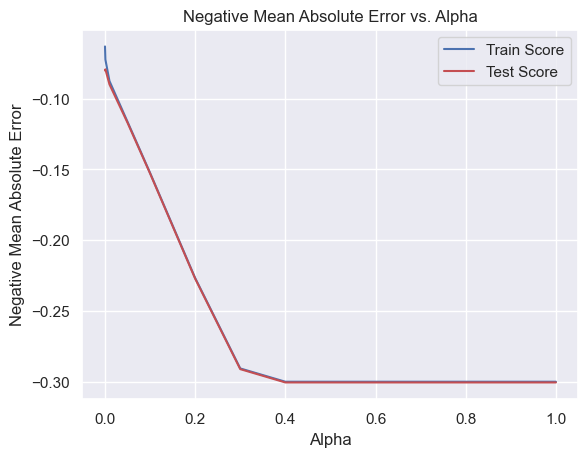

In [111]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='b', label='Train Score')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='r', label='Test Score')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs. Alpha")
plt.legend()
plt.show()


In [112]:
#From the above graph, we observe that the Negative Mean Absolute Error is quite low around alpha = 0.4 and stabilizes thereafter. We will select a small alpha value to balance the trade-off between Bias-Variance and to obtain coefficients for the smallest features

In [113]:
# Using Lasso Regression with alpha = 0.01 to generate coefficients
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_


array([-0.00647734,  0.01251898,  0.01519048,  0.11081608,  0.04603537,
        0.        ,  0.03554753,  0.        ,  0.04302754,  0.        ,
        0.        , -0.        ,  0.11963869,  0.00888311,  0.        ,
        0.00404327,  0.00091726, -0.        , -0.01183661,  0.02329089,
        0.03276911,  0.00768476,  0.00548352,  0.        ,  0.00104148,
        0.00336137,  0.        , -0.09159652,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [114]:
# The advantage of Lasso is evident here as it sets coefficients of insignificant features to zero
# Lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 12.003),
 ('MSSubClass', -0.006),
 ('LotFrontage', 0.013),
 ('LotArea', 0.015),
 ('OverallQual', 0.111),
 ('OverallCond', 0.046),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.036),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.043),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.12),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.004),
 ('HalfBath', 0.001),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.012),
 ('Fireplaces', 0.023),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.001),
 ('ScreenPorch', 0.003),
 ('PoolArea', 0.0),
 ('PropAge', -0.092),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_F

In [115]:
# Lasso Regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# Evaluating performance using R2 score
y_train_pred = lm.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(f"Train R-squared: {train_r2:.4f}")

y_test_pred = lm.predict(X_test)
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(f"Test R-squared: {test_r2:.4f}")


Train R-squared: 0.8935
Test R-squared: 0.8752


In [116]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13582351340630727


In [117]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [118]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.003
1   MSSubClass  -0.006
2  LotFrontage   0.013
3      LotArea   0.015
4  OverallQual   0.111

In [119]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0          constant  12.003
13        GrLivArea   0.120
4       OverallQual   0.111
5       OverallCond   0.046
9       TotalBsmtSF   0.043
..              ...     ...
164    HeatingQC_TA  -0.002
172  KitchenQual_TA  -0.004
1        MSSubClass  -0.006
19     KitchenAbvGr  -0.012
28          PropAge  -0.092

[210 rows x 2 columns]

In [120]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0            constant  12.003
13          GrLivArea   0.120
4         OverallQual   0.111
5         OverallCond   0.046
9         TotalBsmtSF   0.043
7          BsmtFinSF1   0.036
21         GarageArea   0.033
20         Fireplaces   0.023
3             LotArea   0.015
2         LotFrontage   0.013
14       BsmtFullBath   0.009
22         WoodDeckSF   0.008
133  Foundation_PConc   0.005
23        OpenPorchSF   0.005
16           FullBath   0.004
26        ScreenPorch   0.003
25          3SsnPorch   0.001
17           HalfBath   0.001
164      HeatingQC_TA  -0.002
172    KitchenQual_TA  -0.004
1          MSSubClass  -0.006
19       KitchenAbvGr  -0.012
28            PropAge  -0.092

In [121]:
# These 16 variables obtained from Lasso Regression are concluded to strongly affect SalePrice
pred.shape


(23, 2)

In [122]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', '3SsnPorch', 'HalfBath', 'HeatingQC_TA', 'KitchenQual_TA', 'MSSubClass', 'KitchenAbvGr', 'PropAge']


In [123]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
840    0.040537    -0.013477     2.106384    -0.884128   -0.308860   
1236   0.363307     0.734488    -0.530555    -0.656905    0.040206   
561   -0.167918    -0.761442    -0.530555     0.886731   -0.223952   
44    -0.703626    -0.761442     0.348424     0.296445   -0.780573   
1277   0.582969    -0.013477    -0.530555     1.605448    0.068509   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
840    -0.654672   -0.920004  0.176809    -0.441713     -0.812941   
1236   -1.019985   -0.920004 -0.754915    -1.554688     -0.812941   
561     1.488027    0.672862 -0.032968     0.346644      1.111533   
44     -0.600812   -0.920004 -0.234921     0.022026      1.111533   
1277    0.216458    0.672862  0.735824     0.485766      1.111533   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
840              False    -0.728025  0.871359    -0.263941   -0.747806  
1236              True    -0.258161  0.871359    -0.263941   -0.747806  
561              False    -0.066735 -0.988657    -0.263941    1.248208  
44               False    -0.728025 -0.988657    -0.263941   -0.747806  
1277             False    -0.728025 -0.988657    -0.263941   -0.747806

In [124]:
X_train_lasso.shape

(999, 15)

In [125]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
243   -0.633930    -0.103845     0.499899    -1.099433   -0.912792   
1418  -0.793595    -0.834164    -0.488381     0.179519   -0.676225   
261    2.334095     1.356793    -0.488381     1.014048    1.945729   
1281  -0.367092     0.626474    -0.488381     0.586907    0.053191   
1105   2.439080     1.356793    -0.488381     0.967136    1.176885   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
243    -1.002919    0.546903  0.052266     0.287749     -0.831389   
1418   -0.944970   -0.986570 -0.123323     0.081061      1.117605   
261    -1.002919    0.546903 -0.080045    -0.022283     -0.831389   
1281    1.437890    0.546903 -0.253493    -1.004050      1.117605   
1105    1.389213    2.080377  0.220642     1.476204      1.117605   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
243              False    -0.340276 -1.102642    -0.287674   -0.745869  
1418             False     0.488754 -1.102642    -0.287674   -0.745869  
261               True     1.317784  0.828107    -0.287674   -0.745869  
1281             False     0.074239  0.828107     1.371833   -0.745869  
1105              True    -0.285007  0.828107    -0.287674    0.673812

In [126]:
# Ridge Regression

# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                    20, 50, 100, 500, 1000]}

ridge = Ridge()

# Cross-validation
folds = 5
model_cv = GridSearchCV(estimator=ridge, 
                        param_grid=params, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.024510      0.015777         0.002562        0.000894      0.0001   
1       0.006891      0.002823         0.003544        0.003176       0.001   
2       0.004987      0.002288         0.003379        0.001188        0.01   
3       0.006864      0.002813         0.003128        0.001556        0.05   
4       0.004678      0.002201         0.002633        0.001193         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087134          -0.082327          -0.084678   
1   {'alpha': 0.001}          -0.087119          -0.082324          -0.084639   
2    {'alpha': 0.01}          -0.086972          -0.082297          -0.084279   
3    {'alpha': 0.05}          -0.086441          -0.082172          -0.083232   
4     {'alpha': 0.1}          -0.085925          -0.082031          -0.082515   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.081900          -0.082838        -0.083775        0.001928   
1          -0.081875          -0.082811        -0.083754        0.001927   
2          -0.081640          -0.082601        -0.083558        0.001916   
3          -0.080988          -0.082247        -0.083016        0.001854   
4          -0.080421          -0.081907        -0.082560        0.001822   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.061302           -0.061572   
1               25           -0.061300           -0.061574   
2               24           -0.061287           -0.061586   
3               23           -0.061288           -0.061651   
4               22           -0.061343           -0.061735   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.060289           -0.061959           -0.060474   
1           -0.060291           -0.061958           -0.060477   
2           -0.060314           -0.061946           -0.060511   
3           -0.060427           -0.061915           -0.060670   
4           -0.060544           -0.061933           -0.060834   

   mean_train_score  std_train_score  
0         -0.061119         0.000640  
1         -0.061120         0.000639  
2         -0.061129         0.000624  
3         -0.061190         0.000566  
4         -0.061278         0.000525

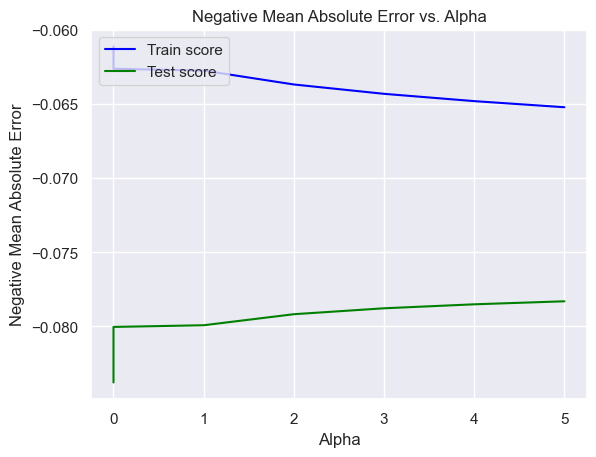

In [128]:
# Plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], color='blue')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], color='green')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs. Alpha")
plt.legend(['Train score', 'Test score'], loc='upper left')
plt.show()


In [129]:
#Since the Negative Mean Absolute Error stabilizes around alpha = 2, we will select this value for further analysis

In [130]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01590232,  0.00825471,  0.02938169,  0.06642601,  0.04674012,
        0.00429927,  0.0351952 ,  0.00932929,  0.02803786,  0.03786572,
        0.04241323,  0.00090067,  0.06909466,  0.01175856, -0.0006056 ,
        0.01905833,  0.01308898,  0.00306473, -0.01249356,  0.00381418,
        0.02185943,  0.01088594,  0.00578125,  0.01089298,  0.0068853 ,
        0.01223172,  0.00407299, -0.06240643,  0.09787295,  0.06196749,
        0.12515806,  0.07506503, -0.00444932,  0.00431883,  0.0007557 ,
        0.0216194 , -0.03678817,  0.0067121 ,  0.01196846, -0.01384995,
       -0.04582173, -0.02243813,  0.0324049 , -0.10814378, -0.01548754,
       -0.02531133,  0.03127217,  0.01686646, -0.01548986,  0.0988481 ,
       -0.06158756, -0.01287262, -0.08678837, -0.11152854, -0.05731304,
       -0.01994963,  0.03428646, -0.01990417,  0.02609813,  0.03570307,
       -0.01464786, -0.0306299 , -0.00462895,  0.00015817,  0.06833399,
        0.08946642, -0.01690056,  0.03399014,  0.00410208,  0.06

In [131]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.743),
 ('MSSubClass', -0.016),
 ('LotFrontage', 0.008),
 ('LotArea', 0.029),
 ('OverallQual', 0.066),
 ('OverallCond', 0.047),
 ('MasVnrArea', 0.004),
 ('BsmtFinSF1', 0.035),
 ('BsmtFinSF2', 0.009),
 ('TotalBsmtSF', 0.028),
 ('1stFlrSF', 0.038),
 ('2ndFlrSF', 0.042),
 ('LowQualFinSF', 0.001),
 ('GrLivArea', 0.069),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.019),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', -0.012),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.022),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.006),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.012),
 ('PoolArea', 0.004),
 ('PropAge', -0.062),
 ('MSZoning_FV', 0.098),
 ('MSZoning_RH', 0.062),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.075),
 ('LotShape_IR2', -0.004),
 ('LotShape_IR3', 0.004),
 ('LotShape_Reg', 0.001),
 ('LandContour_HLS', 0.022),
 ('LandContour_Low', -0.037),
 ('LandContour_Lvl', 0.007),
 ('LotConfig_CulDSac', 0.012),
 (

In [132]:
# Ridge Regression with alpha = 2
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# Predictions
y_train_pred = lm.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(f"Train R-squared: {train_r2:.4f}")

y_test_pred = lm.predict(X_test)
test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(f"Test R-squared: {test_r2:.4f}")


Train R-squared: 0.9425
Test R-squared: 0.8933


In [133]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12560534631803352


In [134]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [135]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  11.743
31            MSZoning_RL   0.125
50   Neighborhood_Crawfor   0.099
29            MSZoning_FV   0.098
66   Neighborhood_StoneBr   0.089
202          SaleType_New   0.082
208  SaleCondition_Normal   0.080
203          SaleType_Oth   0.078
32            MSZoning_RM   0.075
95    Exterior1st_BrkFace   0.073
13              GrLivArea   0.069
65   Neighborhood_Somerst   0.068
70        Condition1_Norm   0.067
4             OverallQual   0.066
103    Exterior1st_Stucco   0.066
197          SaleType_CWD   0.065
30            MSZoning_RH   0.062
133      Foundation_PConc   0.057
199        SaleType_ConLD   0.055
135      Foundation_Stone   0.052

In [136]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                 constant  11.743
1               MSSubClass  -0.016
2              LotFrontage   0.008
3                  LotArea   0.029
4              OverallQual   0.066
..                     ...     ...
205  SaleCondition_AdjLand   0.050
206   SaleCondition_Alloca   0.047
207   SaleCondition_Family   0.025
208   SaleCondition_Normal   0.080
209  SaleCondition_Partial   0.026

[202 rows x 2 columns]

In [137]:
#Observation: While Ridge Regression showed better performance in terms of R-squared values for both Train and Test sets, Lasso is preferred because it assigns zero values to insignificant features, aiding in the selection of predictive variables. It's advisable to opt for a simple yet robust model. An equation can be formulated using the features and coefficients obtained from Lasso."

#This version encapsulates the observation succinctly and emphasizes the benefits of using Lasso despite the slightly better performance of Ridge Regression in this case.

In [138]:
# Assuming pred has 23 rows
index_labels = ['C', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23']
pred.index = index_labels[:23]  # Only assign as many labels as there are rows in pred
pred


Variable   Coeff
C            constant  12.003
x1          GrLivArea   0.120
x2        OverallQual   0.111
x3        OverallCond   0.046
x4        TotalBsmtSF   0.043
x5         BsmtFinSF1   0.036
x6         GarageArea   0.033
x7         Fireplaces   0.023
x8            LotArea   0.015
x9        LotFrontage   0.013
x10      BsmtFullBath   0.009
x11        WoodDeckSF   0.008
x12  Foundation_PConc   0.005
x13       OpenPorchSF   0.005
x14          FullBath   0.004
x15       ScreenPorch   0.003
x16         3SsnPorch   0.001
x17          HalfBath   0.001
x18      HeatingQC_TA  -0.002
x19    KitchenQual_TA  -0.004
x20        MSSubClass  -0.006
x21      KitchenAbvGr  -0.012
x22           PropAge  -0.092

In [139]:
# Assuming pred has 23 rows
index_labels = ['C', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23']
pred.index = index_labels[:23]  # Only assign as many labels as there are rows in pred
pred


Variable   Coeff
C            constant  12.003
x1          GrLivArea   0.120
x2        OverallQual   0.111
x3        OverallCond   0.046
x4        TotalBsmtSF   0.043
x5         BsmtFinSF1   0.036
x6         GarageArea   0.033
x7         Fireplaces   0.023
x8            LotArea   0.015
x9        LotFrontage   0.013
x10      BsmtFullBath   0.009
x11        WoodDeckSF   0.008
x12  Foundation_PConc   0.005
x13       OpenPorchSF   0.005
x14          FullBath   0.004
x15       ScreenPorch   0.003
x16         3SsnPorch   0.001
x17          HalfBath   0.001
x18      HeatingQC_TA  -0.002
x19    KitchenQual_TA  -0.004
x20        MSSubClass  -0.006
x21      KitchenAbvGr  -0.012
x22           PropAge  -0.092